# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
porter_data = pd.read_csv("porter_data_1.csv")

In [9]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [10]:
porter_data.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [11]:
porter_data.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [15]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter_data['created_at'] = pd.to_datetime(porter_data['created_at'])
porter_data['actual_delivery_time'] = pd.to_datetime(porter_data['actual_delivery_time'])

In [16]:
porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [17]:
porter_data.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [19]:
# Convert categorical features to category type
porter_data['store_primary_category'] = porter_data['store_primary_category'].astype('category')
porter_data['order_protocol'] = porter_data['order_protocol'].astype('category')
porter_data['market_id'] = porter_data['market_id'].astype('category')

porter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [22]:
# Calculate time taken in minutes
porter_data['delivery_time_minutes'] = (porter_data['actual_delivery_time'] - porter_data['created_at']).dt.seconds/60

In [23]:
porter_data.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  
0                      21.0     34.44                   47.0  
1                       2.0     27.60                   44.0  
2                      18.0     11.56                   55.0  
3                       8.0     31.80                   59.0  
4                       7.0      8.20                   46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [25]:
# Extract the hour and day of week from the 'created_at' timestamp
porter_data['order_hour'] = porter_data['created_at'].dt.hour
porter_data['order_day_of_week'] = porter_data['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
porter_data['isWeekend'] = porter_data['order_day_of_week'].apply(lambda x: 1 if x>=5 else 0)


In [26]:
# Drop unnecessary columns
porter_data.drop(['created_at','actual_delivery_time'], axis=1, inplace=True)
porter_data.drop(['store_primary_category'], axis=1, inplace=True)

In [27]:
porter_data.head()

market_id order_protocol  total_items  subtotal  num_distinct_items  \
0       1.0            1.0            4      3441                   4   
1       2.0            2.0            1      1900                   1   
2       2.0            3.0            4      4771                   3   
3       1.0            1.0            1      1525                   1   
4       1.0            1.0            2      3620                   2   

   min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  \
0             557            1239                   33.0                14.0   
1            1400            1400                    1.0                 2.0   
2             820            1604                    8.0                 6.0   
3            1525            1525                    5.0                 6.0   
4            1425            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_time_minutes  order_hour  \
0                      21.0     34.44                   47.0          22   
1                       2.0     27.60                   44.0          21   
2                      18.0     11.56                   55.0           0   
3                       8.0     31.80                   59.0           3   
4                       7.0      8.20                   46.0           2   

   order_day_of_week  isWeekend  
0                  4          0  
1                  1          0  
2                  0          0  
3                  3          0  
4                  1          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [30]:
# Define target variable (y) and features (X)
y = porter_data.pop('delivery_time_minutes')
X = porter_data

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=100)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [35]:
# Define numerical and categorical columns for easy EDA and data manipulation
cat_cols = ['market_id', 'order_protocol', 'order_hour', 'order_day_of_week', 'isWeekend']

num_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

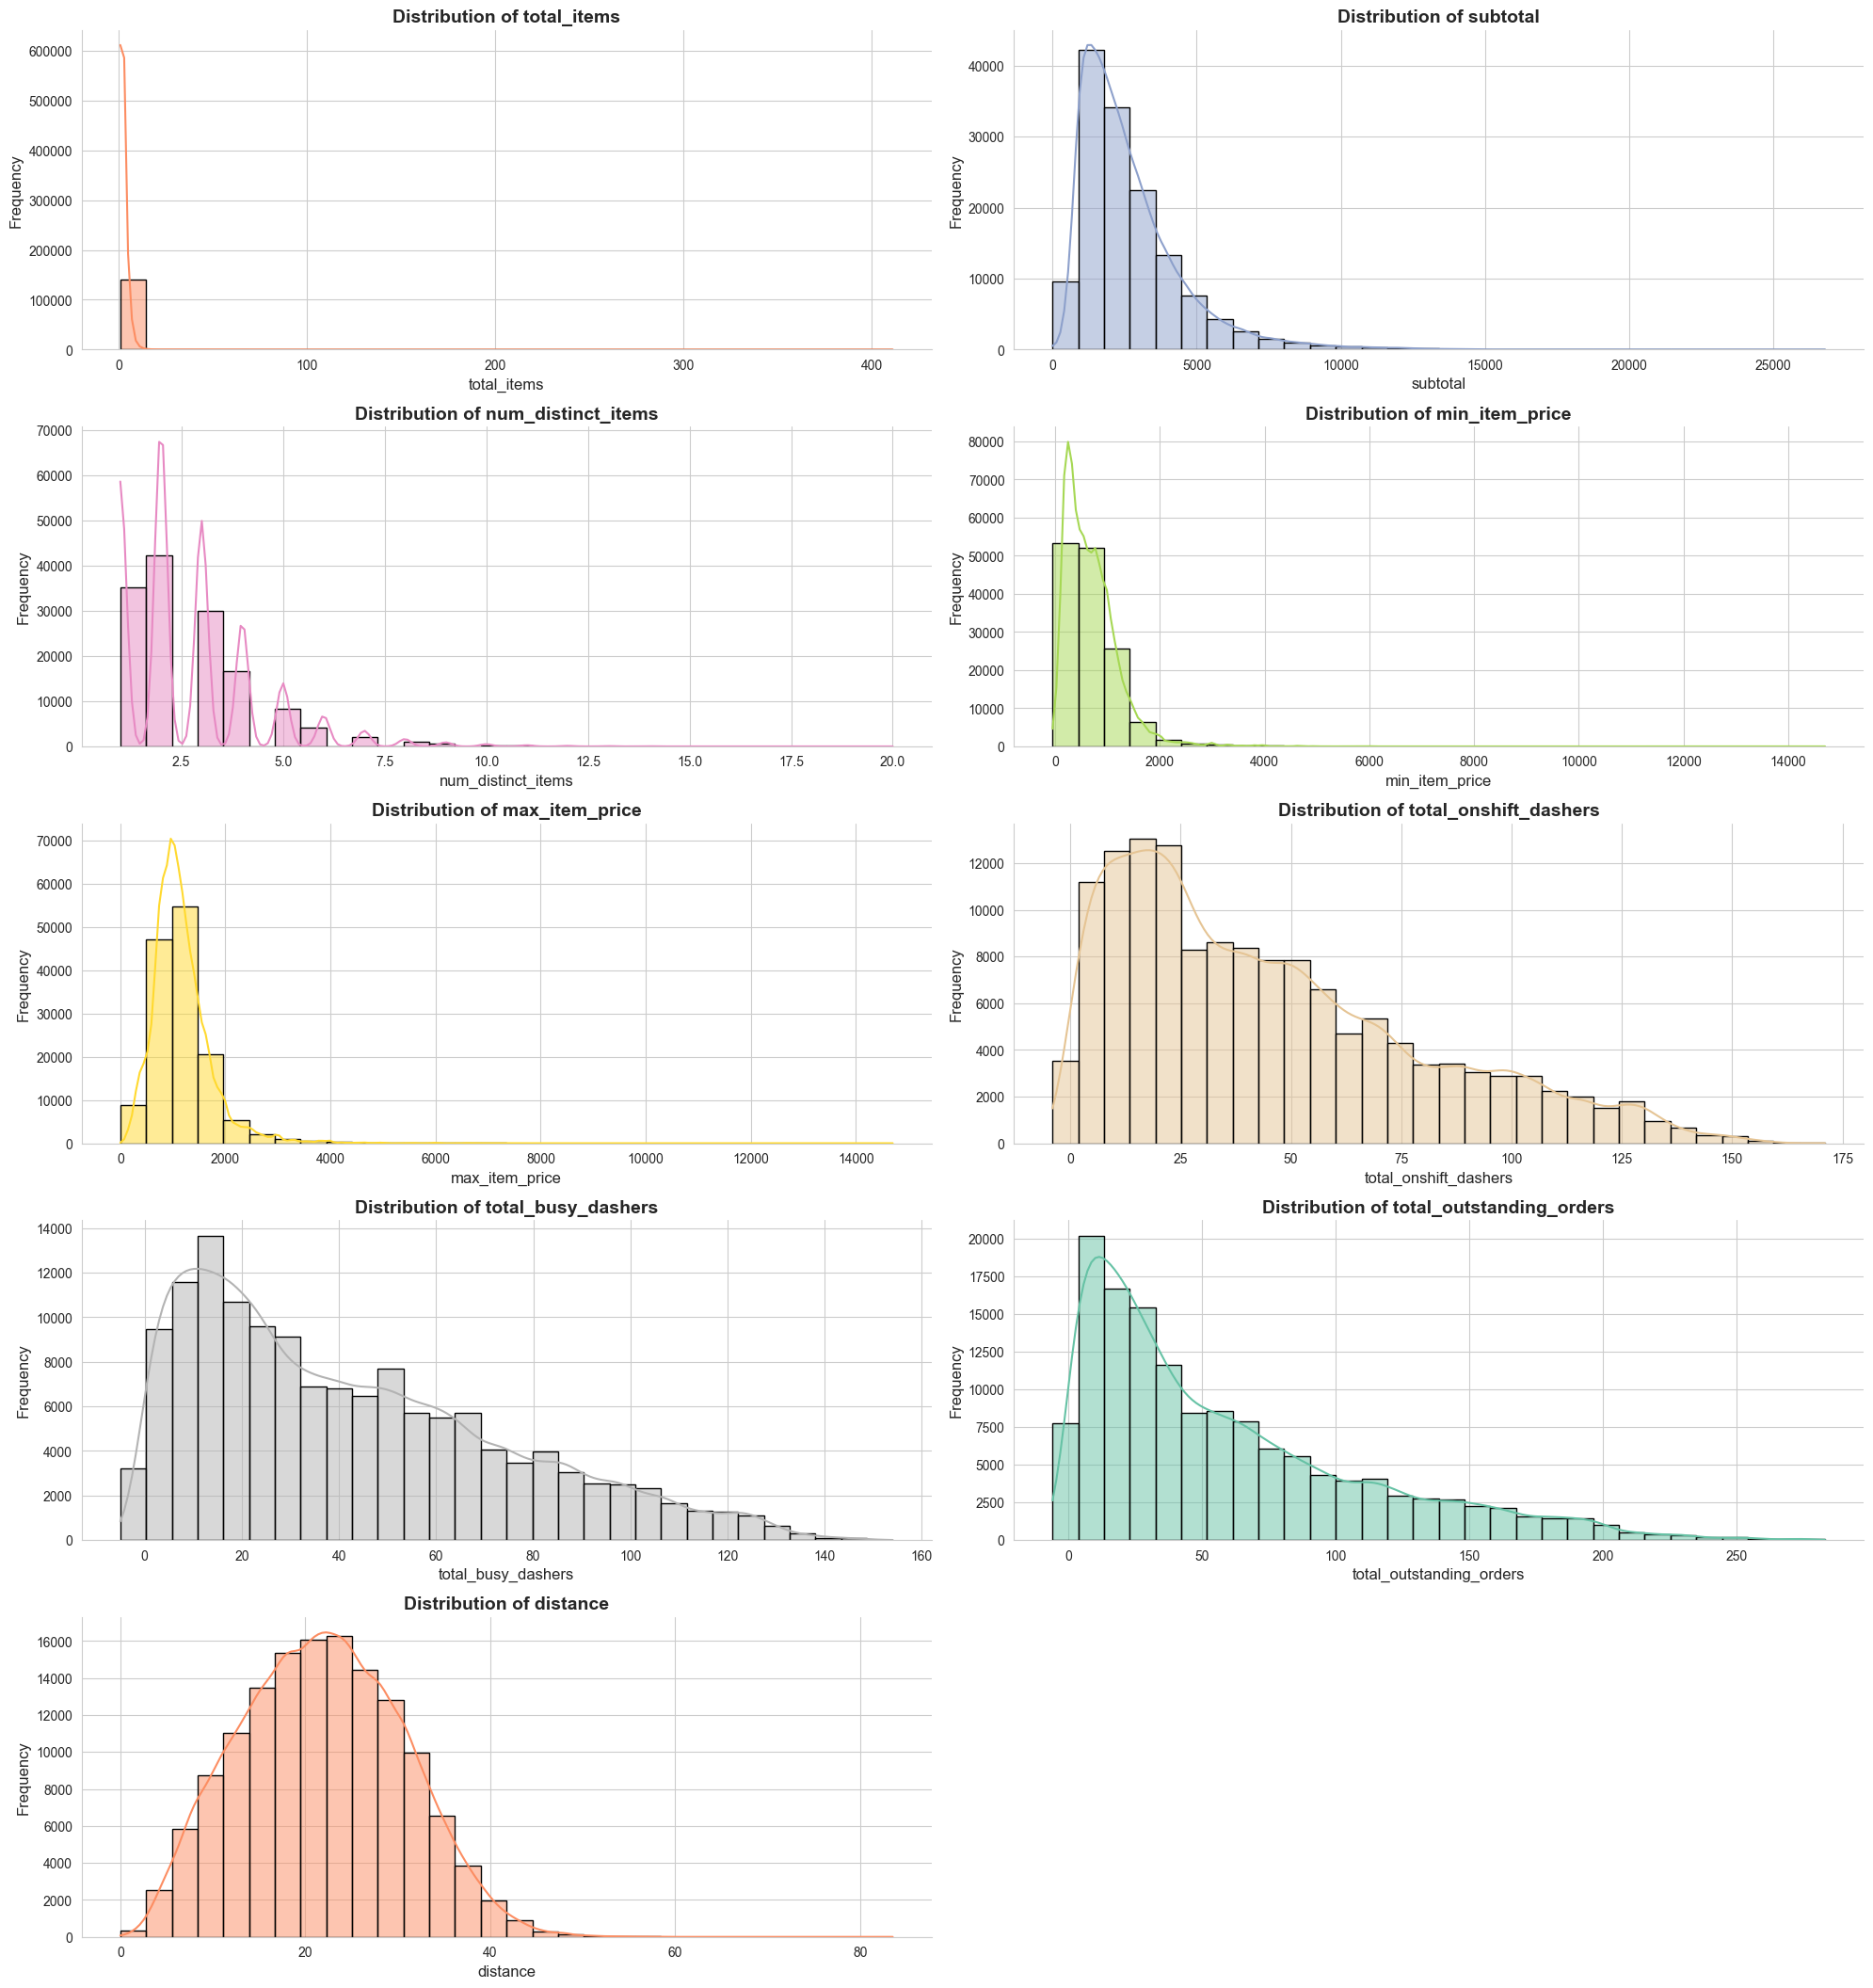

In [37]:
# Plot distributions for all numerical columns
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")
plt.figure(figsize=(20, 25))

for i, var in enumerate(num_cols, 1):
    plt.subplot(6, 2, i)
    sns.histplot(X_train[var], bins=30, kde=True, color=palette[i % len(palette)], edgecolor='black',linestyle=('solid'))
    
    plt.title(f'Distribution of {var}', fontsize=14, fontweight='bold')
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    sns.despine()

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

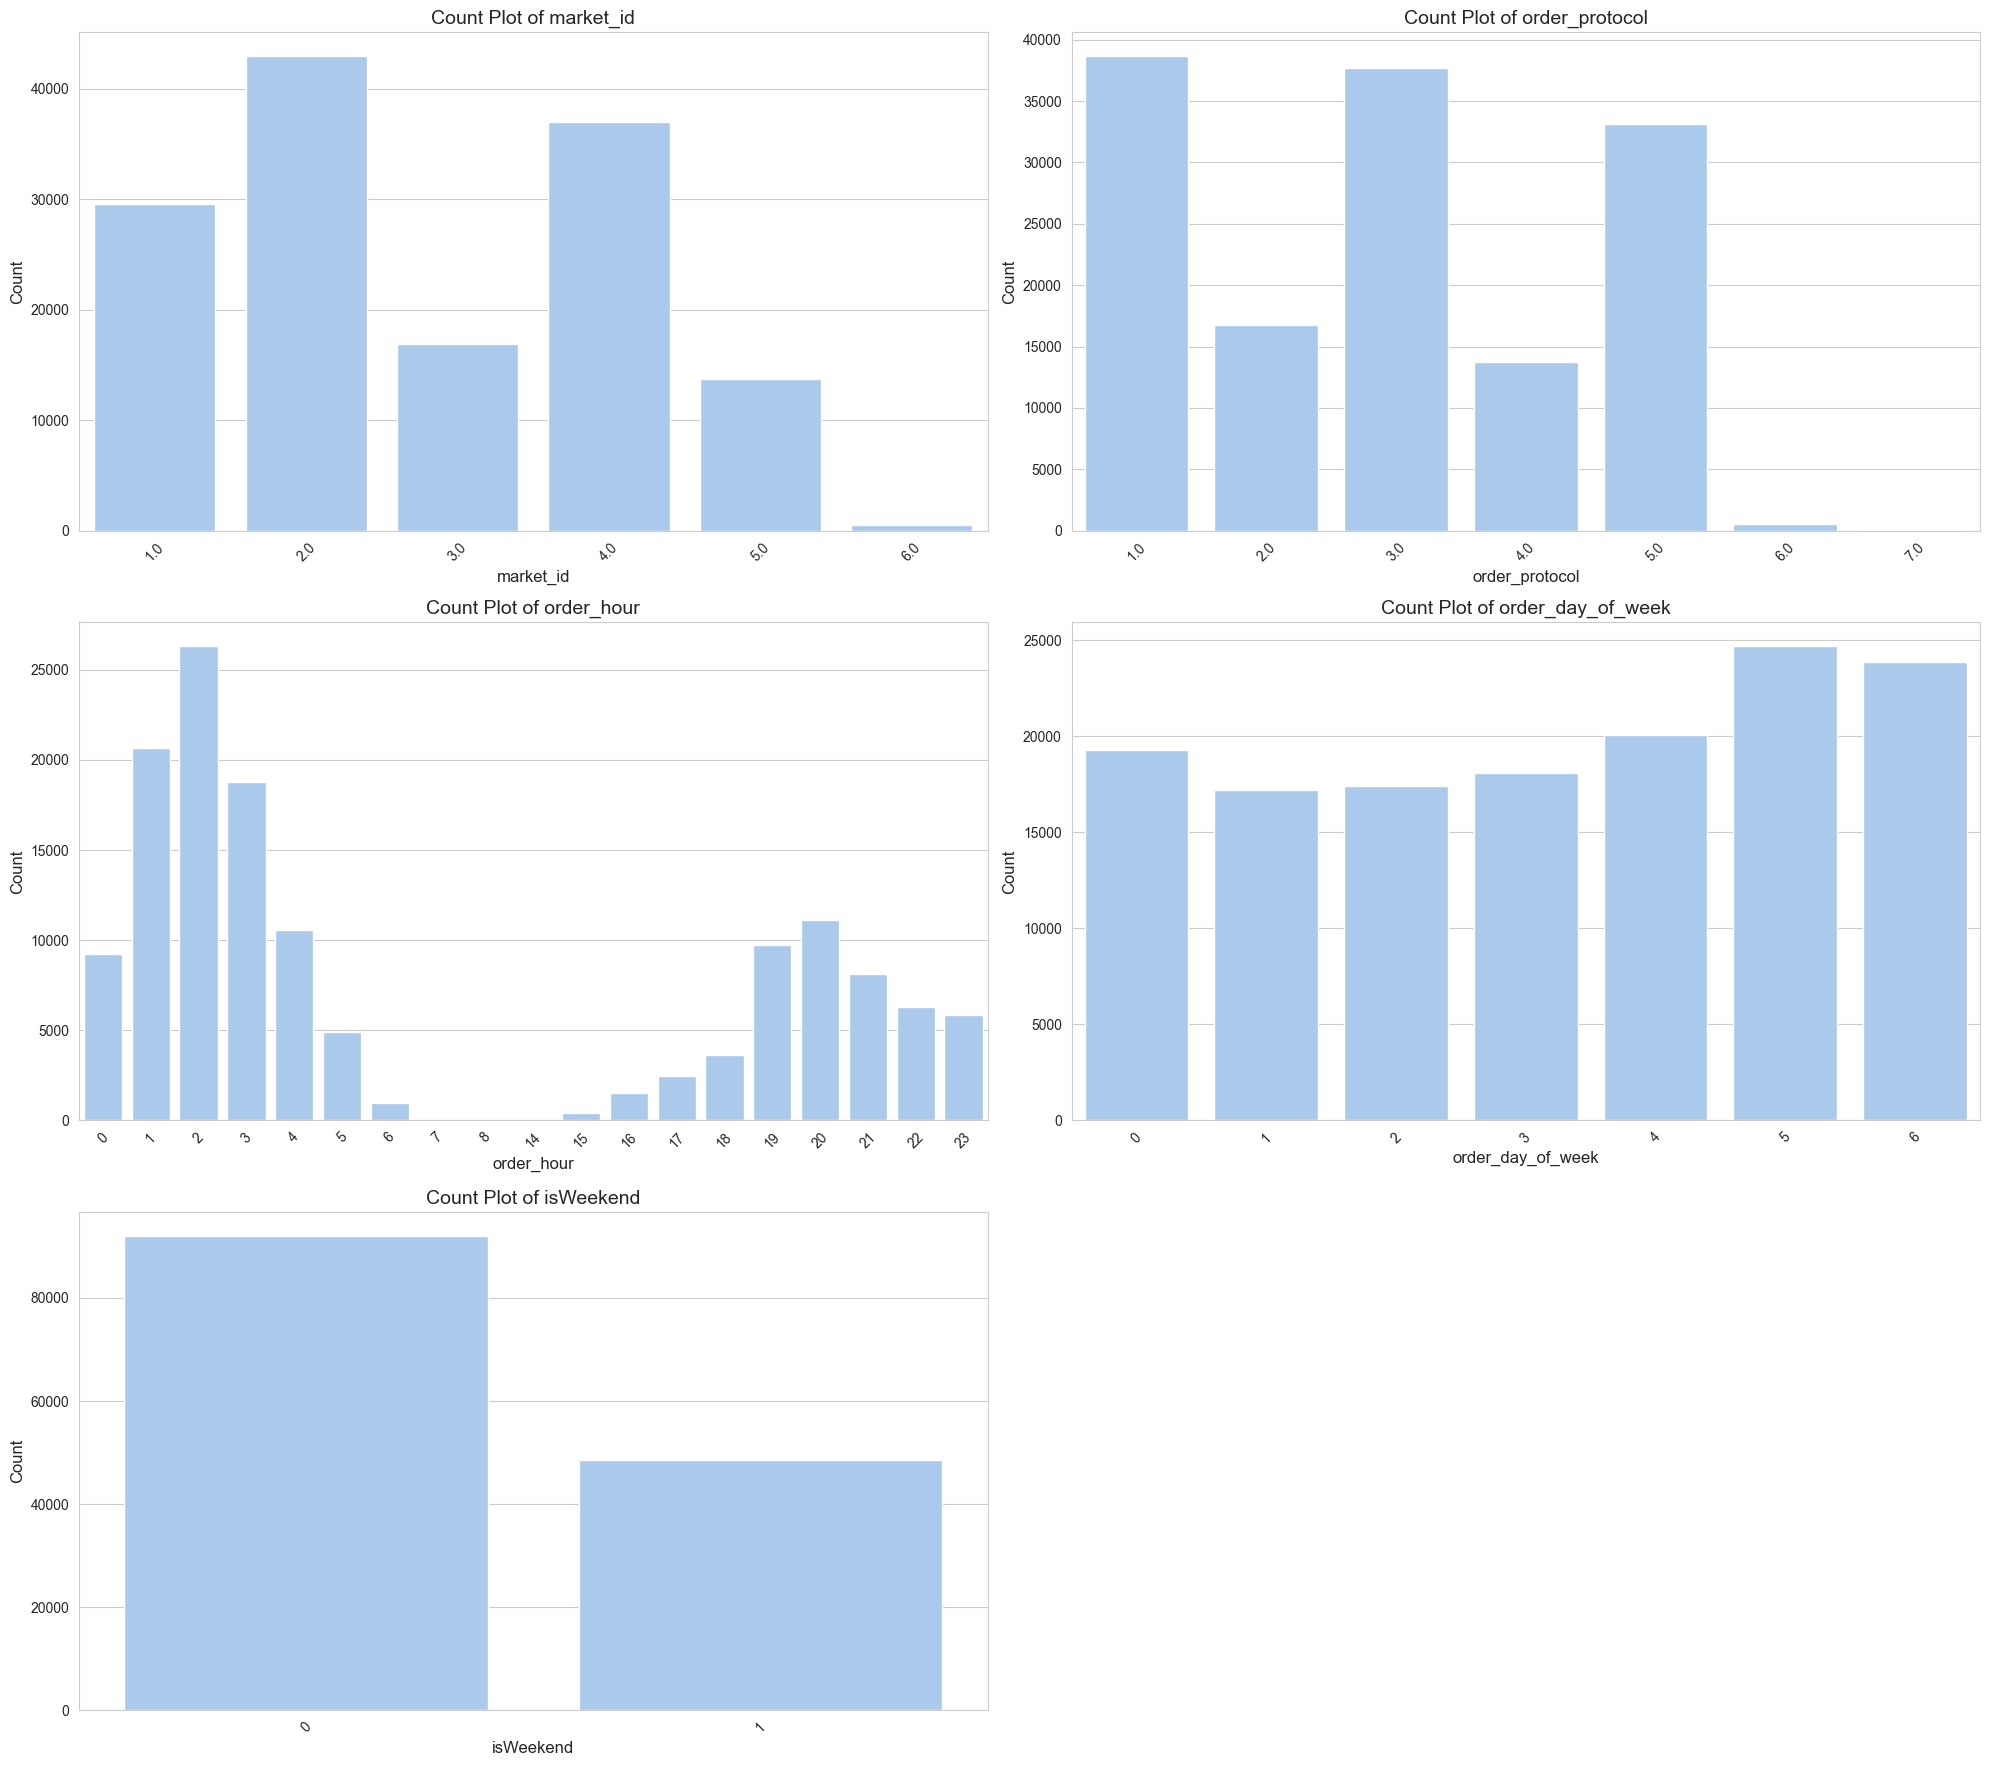

In [39]:
# Distribution of categorical columns
sns.set_palette("pastel")
plt.figure(figsize=(20, 35))
for i, var in enumerate(cat_cols, start=1):
    plt.subplot(6, 2, i)
    sns.countplot(data=X_train, x=var)
    plt.title(f'Count Plot of {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

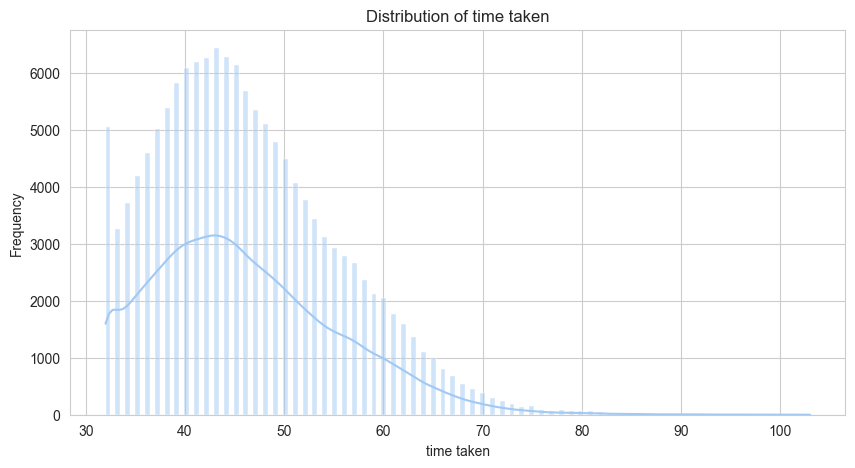

In [41]:
# Distribution of time_taken
plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True)
plt.title('Distribution of time taken')
plt.xlabel('time taken')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

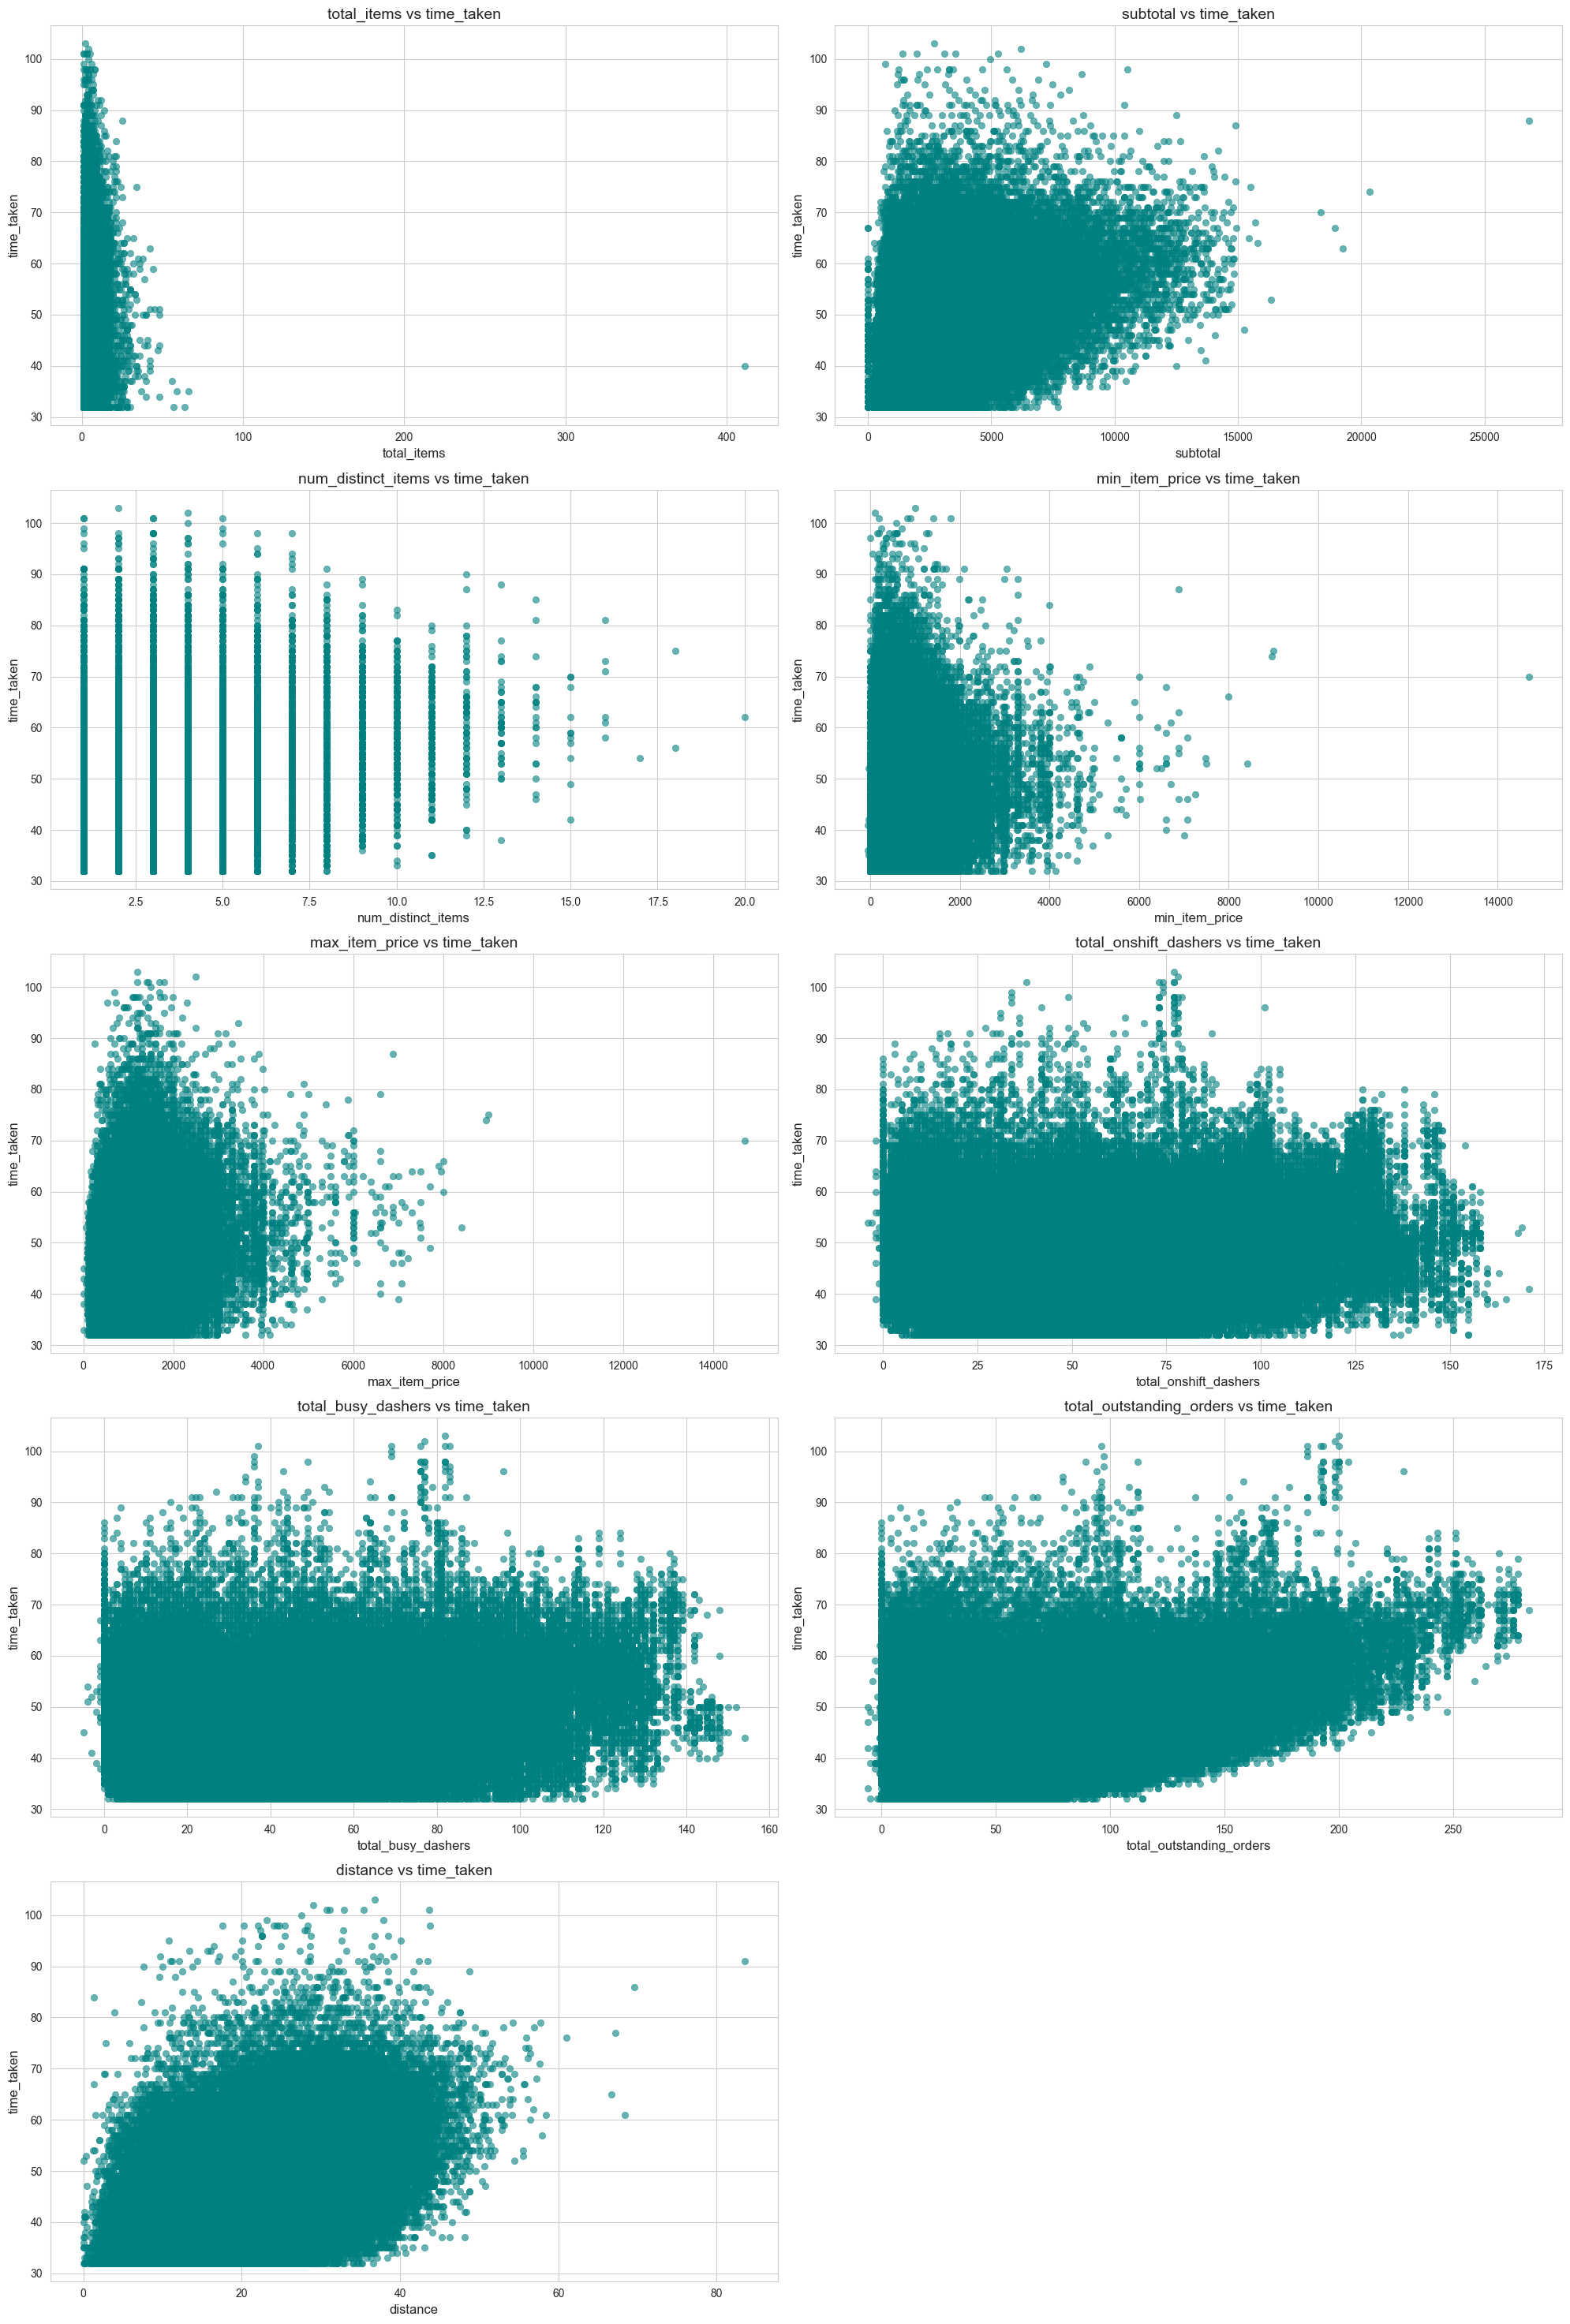

In [44]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(20, 35))

for i, var in enumerate(num_cols, start=1):
    plt.subplot(6, 2, i)
    sns.scatterplot(x=X_train[var], y=y_train, color='teal', alpha=0.6, edgecolor=None)
    plt.title(f'{var} vs time_taken', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('time_taken', fontsize=12)

plt.tight_layout()
plt.show()


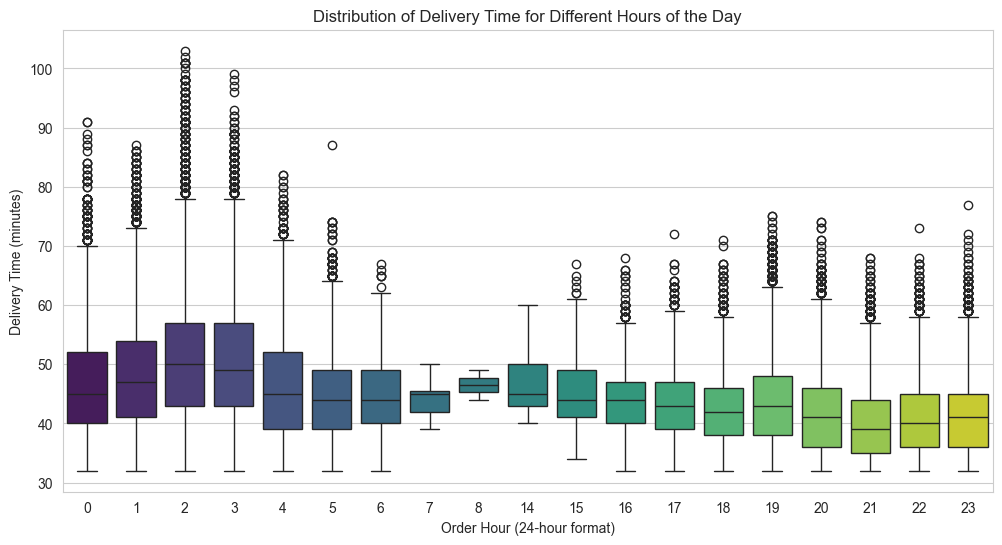

In [45]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))

# Create a boxplot to show the time_taken for different hours
sns.boxplot(x=X_train['order_hour'], y=y_train, palette="viridis")

# Set labels and title
plt.xlabel("Order Hour (24-hour format)")
plt.ylabel("Delivery Time (minutes)")
plt.title("Distribution of Delivery Time for Different Hours of the Day")

plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

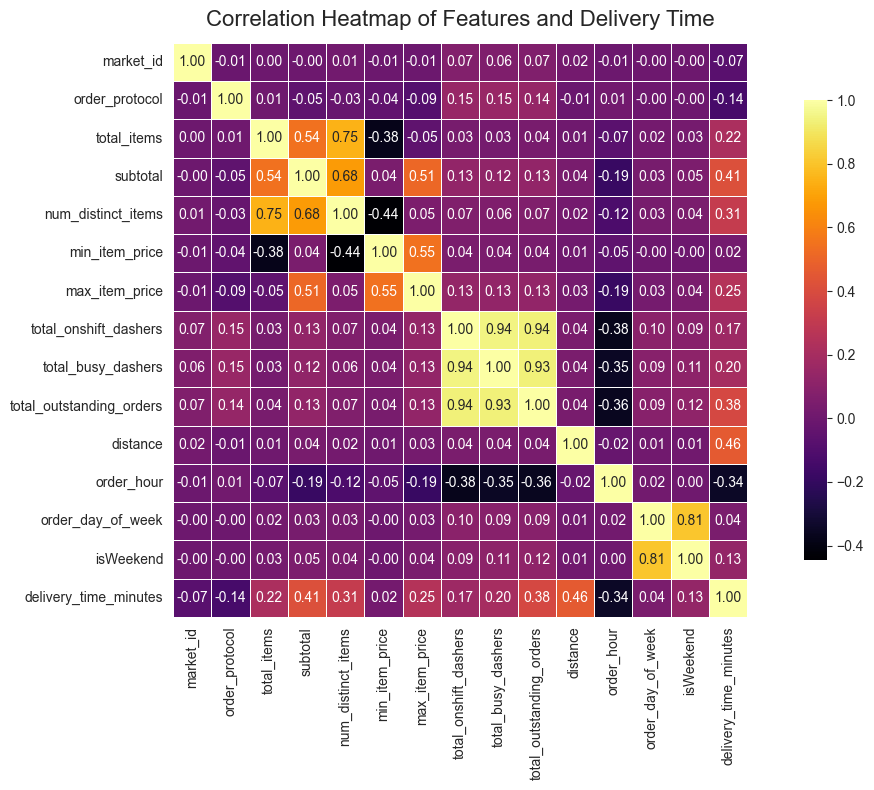

In [48]:
# Plot the heatmap of the correlation matrix
train_corr = X_train.copy()
train_corr['delivery_time_minutes'] = y_train

# Compute the correlation matrix
corr_matrix_test = train_corr.corr()

# Set the figure size and plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix_test,
    annot=True,
    cmap="inferno",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True
)

# Add a title to the plot
plt.title("Correlation Heatmap of Features and Delivery Time", fontsize=16, pad=12)

# Display the heatmap
plt.tight_layout()
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [50]:
# Drop 3-5 weakly correlated columns from training dataset
# Set a correlation threshold
threshold = 0.1

# Find features with weak correlation (absolute value < threshold)
weak_features = corr_matrix_test['delivery_time_minutes'][abs(corr_matrix_test['delivery_time_minutes']) < threshold].index

print(f"Dropping features due to weak correlation: {list(weak_features)}")

# Drop weak features from X_train and X_test
X_train = X_train.drop(columns=weak_features)
X_test = X_test.drop(columns=weak_features)

Dropping features due to weak correlation: ['market_id', 'min_item_price', 'order_day_of_week']


In [51]:
X_train.head()

order_protocol  total_items  subtotal  num_distinct_items  \
42111             2.0            1      1350                   1   
58452             5.0            5      4285                   5   
20644             2.0            6      7880                   3   
79735             2.0            3      3660                   3   
167933            5.0            5      8575                   5   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
42111             1350                   23.0                20.0   
58452              900                  112.0               100.0   
20644             1450                   80.0                79.0   
79735             1450                  127.0               106.0   
167933            2625                   44.0                44.0   

        total_outstanding_orders  distance  order_hour  isWeekend  
42111                       19.0      9.60          20          0  
58452                      207.0     34.56           2          1  
20644                      115.0     34.92           3          0  
79735                      173.0     25.76           2          1  
167933                      61.0     17.72           2          0

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

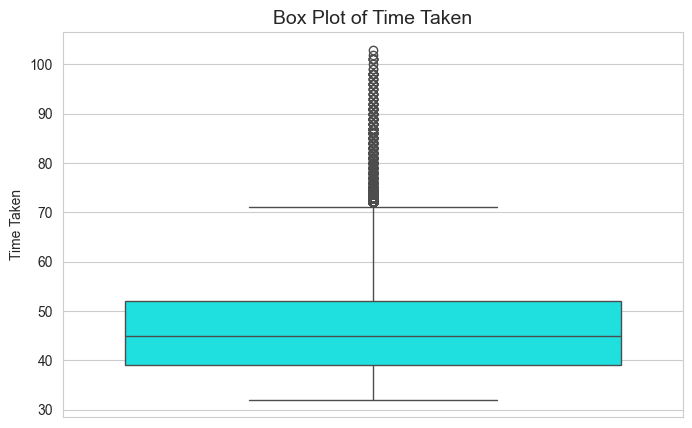

In [54]:
# Boxplot for time_taken
plt.figure(figsize=(8, 5))
sns.boxplot(y=y_train, color='cyan')
plt.title("Box Plot of Time Taken", fontsize=14)
plt.ylabel("Time Taken")
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [56]:
# Handle outliers
y_train = y_train[y_train <= 70 ]

X_train = X_train.loc[y_train.index]

print("New X_train shape:", X_train.shape)
print("New y_train shape:", y_train.shape)


New X_train shape: (138913, 11)
New y_train shape: (138913,)


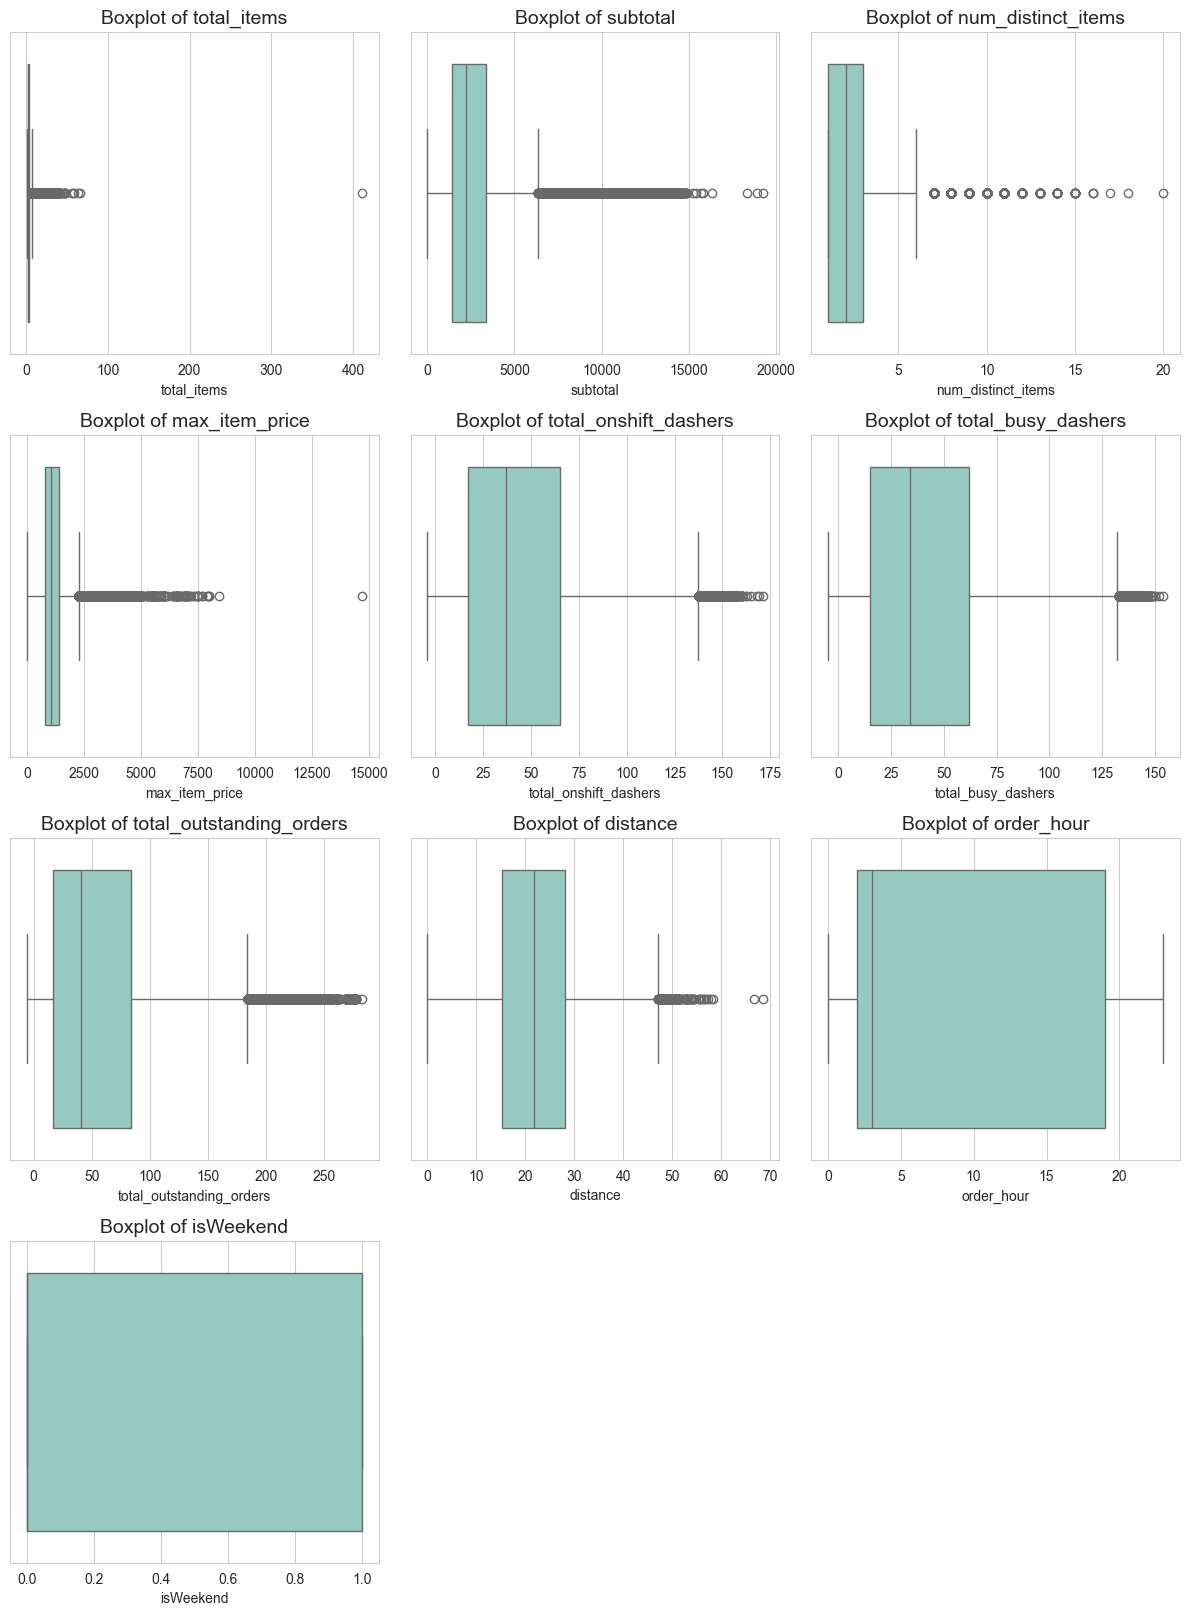

In [57]:
numerical_cols = X_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, len(numerical_cols) * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 3, i)  
    sns.boxplot(x=X_train[col], palette="Set3")
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [58]:
X_train = X_train[X_train['total_items'] <= 7]
X_train = X_train[X_train['subtotal'] <= 12000]
X_train = X_train[X_train['num_distinct_items'] < 7]
X_train = X_train[X_train['max_item_price'] <= 4000]
X_train = X_train[X_train['total_onshift_dashers'] <= 55]
X_train = X_train[X_train['total_outstanding_orders'] <= 250]
X_train = X_train[X_train['distance'] <= 55 ]

y_train = y_train.loc[X_train.index]

print(X_train.shape)
print(y_train.shape)

(89300, 11)
(89300,)


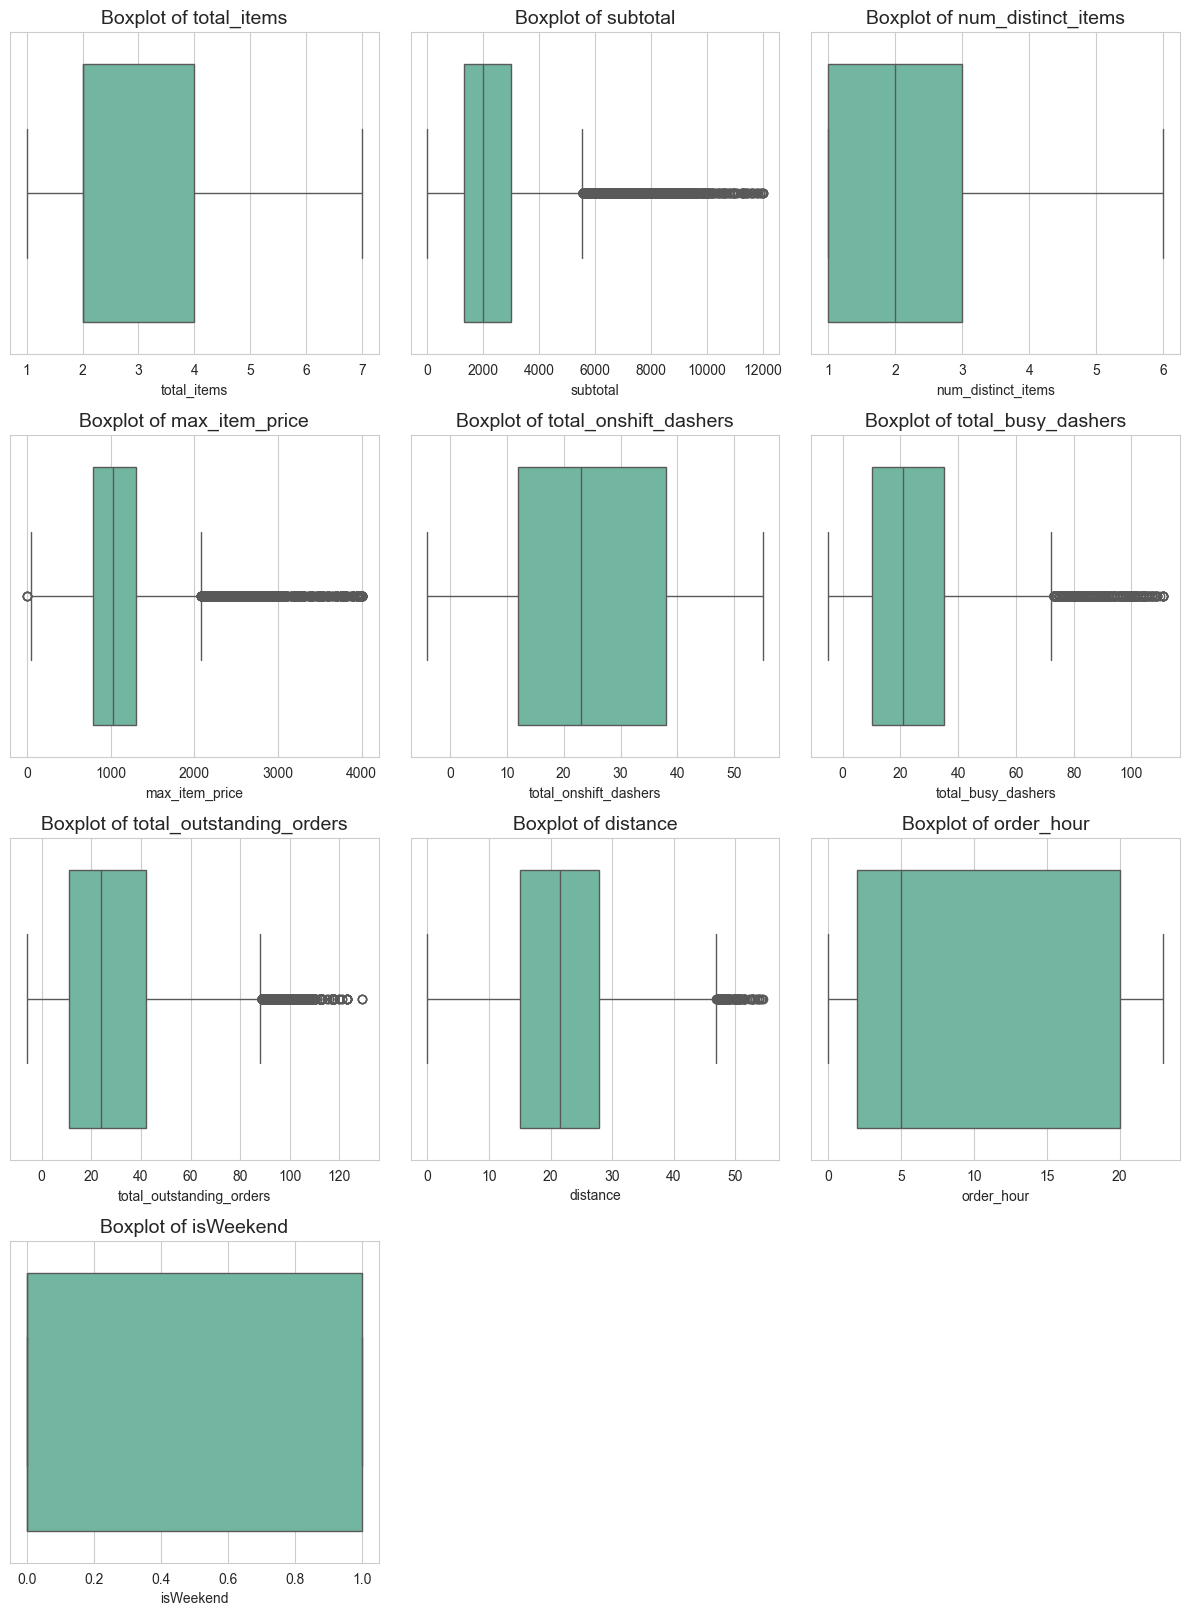

In [59]:
numerical_cols = X_train.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, len(numerical_cols) * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 3, i)  
    sns.boxplot(x=X_train[col], palette="Set2")
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [61]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']
Categorical Columns: ['order_protocol']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

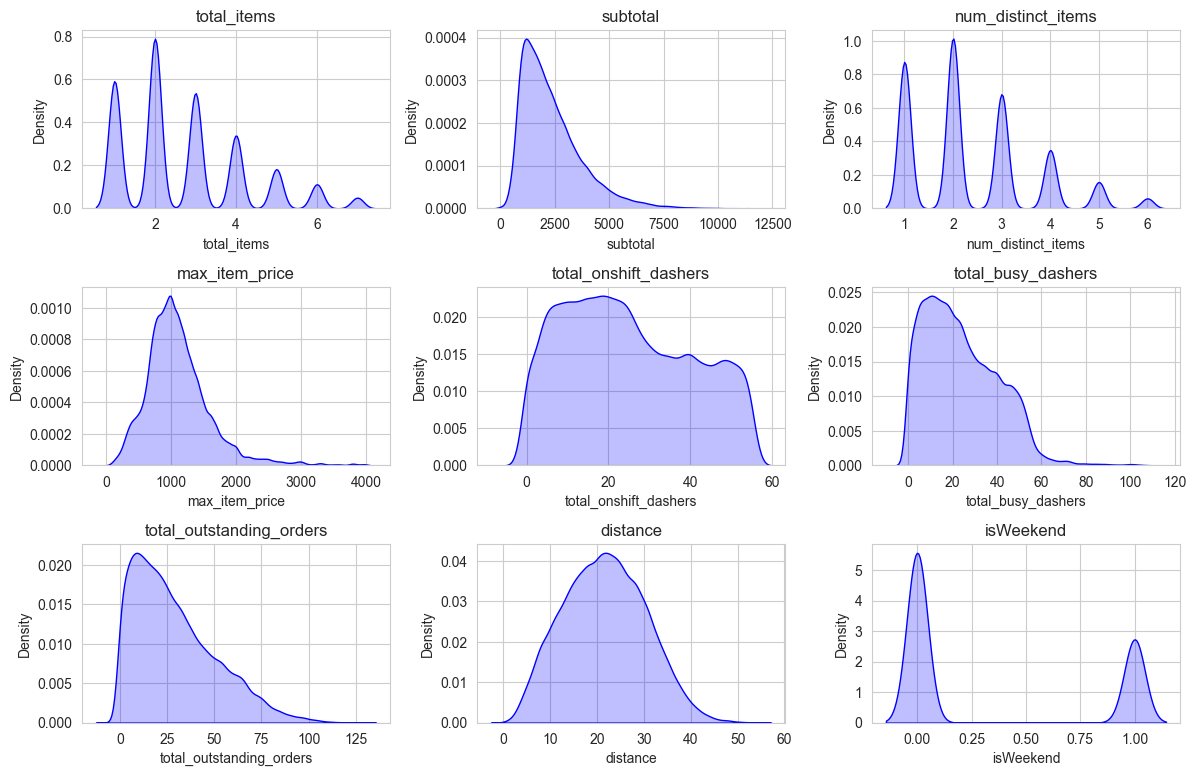

In [64]:
# Plot distributions for all numerical columns
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(X_train[col], fill=True, color='blue')
    plt.title(col)

plt.tight_layout()
plt.show()


##### **4.1.2**
Check the distribution of categorical features

<Figure size 1200x600 with 0 Axes>

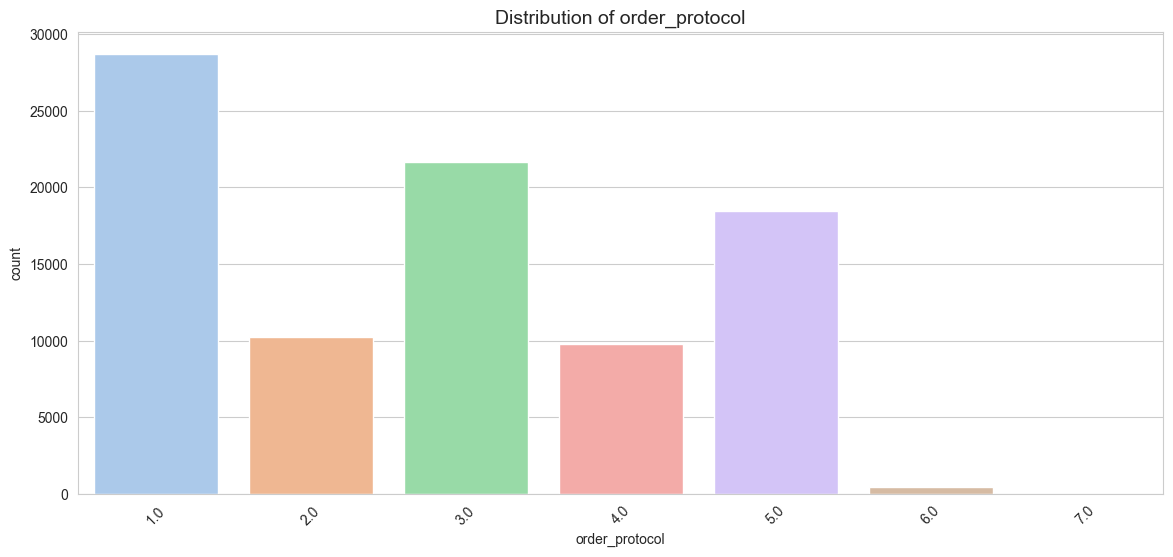

<Figure size 640x480 with 0 Axes>

In [66]:
# Distribution of categorical columns
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(categorical_cols))

for col, color in zip(categorical_cols, colors):
    plt.figure(figsize=(14, 6))  
    sns.countplot(x=X_train[col], palette="pastel")  
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45)  
    plt.show()  

plt.tight_layout()
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

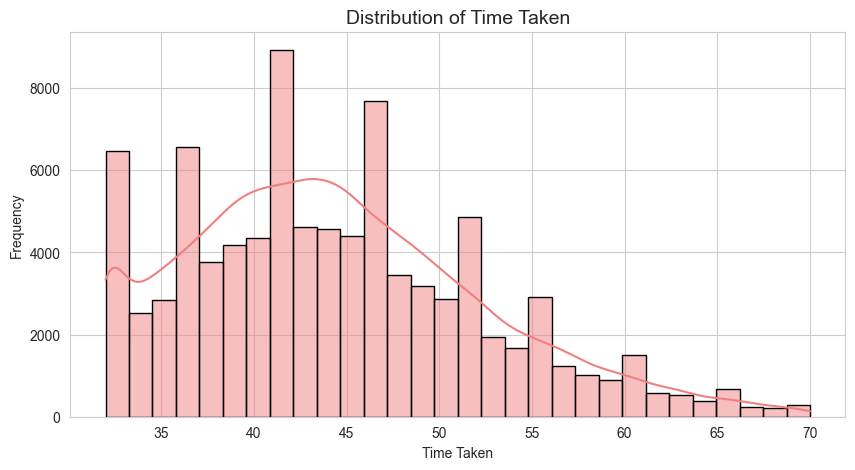

In [68]:
# Distribution of time_taken
plt.figure(figsize=(10, 5))

sns.histplot(y_train, bins=30, kde=True, color='lightcoral', edgecolor='black')

plt.title("Distribution of Time Taken", fontsize=14)
plt.xlabel("Time Taken")
plt.ylabel("Frequency")

plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

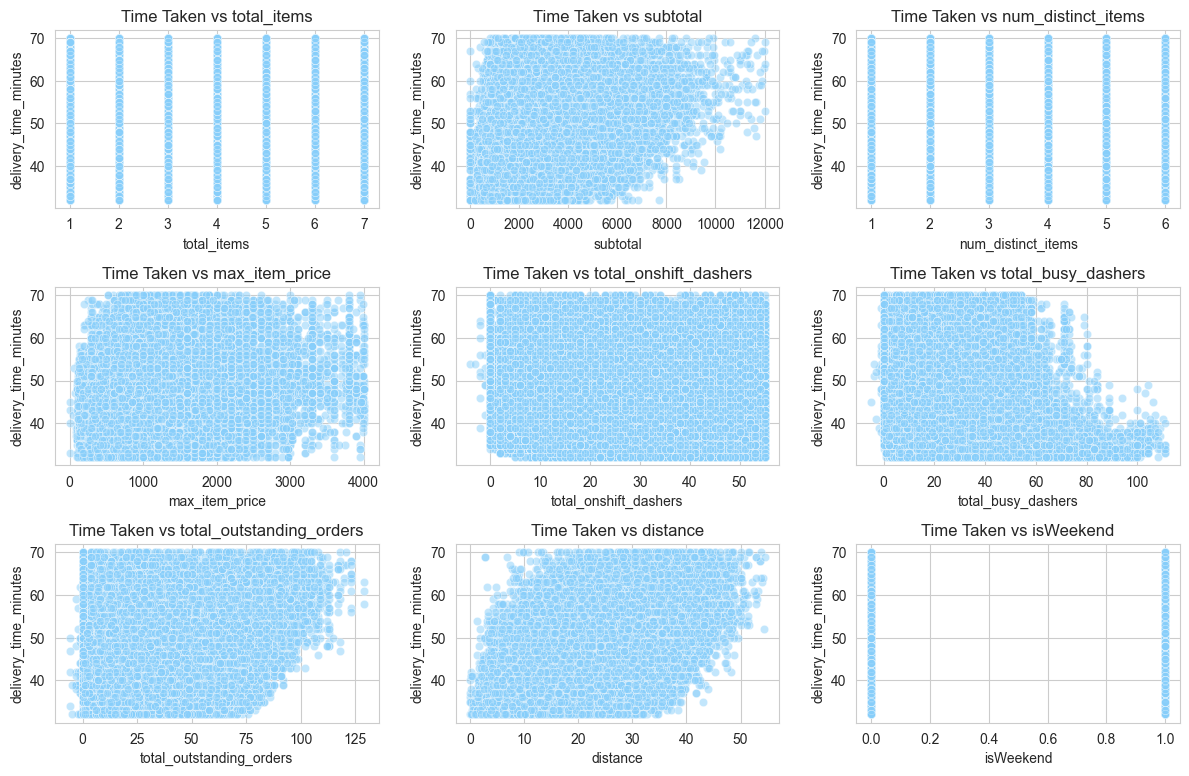

In [70]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i) 
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5, color='lightskyblue')
    plt.title(f"Time Taken vs {col}")

plt.tight_layout()
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [72]:
# Drop the weakly correlated columns from training dataset
corr_with_target = X_train.corrwith(y_train).abs()
weak_features = corr_with_target[corr_with_target < 0.1].index.tolist()
print("Dropped columns:", weak_features)
X_train = X_train.drop(columns=weak_features)

Dropped columns: ['total_busy_dashers', 'isWeekend']


In [73]:
X_test = X_test.drop(columns=weak_features)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [76]:
# Import libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [78]:
# Apply scaling to the numerical columns
X_train_scaler = X_train.copy()
X_test_scaler  = X_test.copy()

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
print("Numeric columns:", numerical_cols)

Numeric columns: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_outstanding_orders', 'distance']


In [79]:
X_train_scaler.columns

Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_outstanding_orders',
       'distance', 'order_hour'],
      dtype='object')

In [80]:
X_test_scaler.columns

Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_outstanding_orders',
       'distance', 'order_hour'],
      dtype='object')

In [81]:
X_train_scaler[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaler[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [82]:
X_train_scaler.head()

order_protocol  total_items  subtotal  num_distinct_items  \
42111             2.0    -1.148132 -0.702030           -1.115550   
167933            5.0     1.524361  4.372876            2.100807   
80691             4.0     0.856238 -1.266767            1.296718   
170910            5.0    -1.148132 -0.541178           -1.115550   
64999             4.0    -0.480009 -0.140102           -1.115550   

        max_item_price  total_onshift_dashers  total_outstanding_orders  \
42111         0.475439              -0.117770                 -0.452593   
167933        2.991889               1.235461                  1.459265   
80691        -1.697590              -1.535441                 -1.317481   
170910        0.927413              -1.213243                 -0.361552   
64999        -0.560746               0.011109                 -0.042909   

        distance  order_hour  
42111  -1.368298          20  
167933 -0.438656           2  
80691   0.486407          14  
170910 -1.858306           4  
64999   0.916882           2

In [83]:
X_train_scaler.describe()

total_items      subtotal  num_distinct_items  max_item_price  \
count  8.930000e+04  8.930000e+04        8.930000e+04    8.930000e+04   
mean   6.468883e-17 -8.354646e-17        1.213413e-16   -5.776641e-17   
std    1.000006e+00  1.000006e+00        1.000006e+00    1.000006e+00   
min   -1.148132e+00 -1.650282e+00       -1.115550e+00   -2.189038e+00   
25%   -4.800088e-01 -7.371501e-01       -1.115550e+00   -6.199571e-01   
50%   -4.800088e-01 -2.454637e-01       -3.114607e-01   -1.660092e-01   
75%    8.562378e-01  4.569454e-01        4.926284e-01    3.905704e-01   
max    2.860608e+00  6.778628e+00        2.904896e+00    5.705708e+00   

       total_onshift_dashers  total_outstanding_orders      distance  \
count           8.930000e+04              8.930000e+04  8.930000e+04   
mean            6.142654e-17              4.774083e-17  3.465587e-16   
std             1.000006e+00              1.000006e+00  1.000006e+00   
min            -1.857639e+00             -1.590603e+00 -2.467382e+00   
25%            -8.266055e-01             -8.167560e-01 -7.454833e-01   
50%            -1.177700e-01             -2.249906e-01 -8.180825e-03   
75%             8.488239e-01              5.943768e-01  7.153831e-01   
max             1.944297e+00              4.554653e+00  3.765342e+00   

         order_hour  
count  89300.000000  
mean      10.543908  
std        9.075656  
min        0.000000  
25%        2.000000  
50%        5.000000  
75%       20.000000  
max       23.000000

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [87]:
# Create/Initialise the model
# Add a constant
X_train_lm = sm.add_constant(X_train_scaler)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [88]:
lr.params

const                       48.447506
order_protocol              -0.542241
total_items                 -0.179251
subtotal                     2.087619
num_distinct_items           0.746909
max_item_price               0.313765
total_onshift_dashers       -9.479381
total_outstanding_orders     8.668993
distance                     4.439904
order_hour                  -0.236648
dtype: float64

In [89]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.867
Model:                               OLS   Adj. R-squared:                  0.867
Method:                    Least Squares   F-statistic:                 6.477e+04
Date:                   Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                           11:19:10   Log-Likelihood:            -2.2176e+05
No. Observations:                  89300   AIC:                         4.435e+05
Df Residuals:                      89290   BIC:                         4.436e+05
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [90]:
# Make predictions
# predictions on train data set
y_pred = lr.predict(X_train_lm)

# predictions on test data set
X_test_lm = sm.add_constant(X_test_scaler)
y_pred_test = lr.predict(X_test_lm)

In [91]:
# Find results for evaluation metrics
# Evaluation metrics of train set
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

# Print results
print(f"Model Evaluation Metrics of train set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics of train set:
Mean Absolute Error (MAE): 2.2206
Mean Squared Error (MSE): 8.4045
Root Mean Squared Error (RMSE): 2.8991
R² Score: 0.8672


In [92]:
# Evaluation metrics of test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f"Model Evaluation Metrics of test set:")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

Model Evaluation Metrics of test set:
Mean Absolute Error (MAE): 2.9583
Mean Squared Error (MSE): 20.0577
Root Mean Squared Error (RMSE): 4.4786
R² Score: 0.7702


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [96]:
# Loop through the number of features and test the model

X_train_scaled = pd.DataFrame(X_train_scaler, columns=numerical_cols)
X_test_scaled = pd.DataFrame(X_test_scaler,columns=numerical_cols)

# Initialize model and RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=8)

# Fitting RFE to training data
rfe.fit(X_train_scaled, y_train)

selected_features = X_train_scaled.columns[rfe.support_]

# Selecting only the important features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

print("Selected Features:", list(selected_features))


Selected Features: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_outstanding_orders', 'distance']


In [97]:
# Build the final model with selected number of features
model.fit(X_train_selected, y_train)

# Making predictions on training and test sets
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

# Evaluating model performance
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display Model Performance comparison for train data and test data
print("Model Performance:")
print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")


Model Performance:
Train MAE: 2.9474, Test MAE: 3.6535
Train MSE: 13.5670, Test MSE: 26.3383
Train R²: 0.7856, Test R²: 0.6982


In [98]:
# Building model using statsmodel for detailed statistics
list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

[('total_items', True, 1),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', True, 1),
 ('total_onshift_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1)]

In [99]:
X_train_rfe = sm.add_constant(X_train_selected)
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()

In [100]:
#Let's see the summary of our linear model
print(lm_rfe.summary())

                              OLS Regression Results                             
Dep. Variable:     delivery_time_minutes   R-squared:                       0.786
Model:                               OLS   Adj. R-squared:                  0.786
Method:                    Least Squares   F-statistic:                 4.674e+04
Date:                   Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                           11:19:10   Log-Likelihood:            -2.4314e+05
No. Observations:                  89300   AIC:                         4.863e+05
Df Residuals:                      89292   BIC:                         4.864e+05
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [101]:
X_train_rfe.columns

Index(['const', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_outstanding_orders',
       'distance'],
      dtype='object')

In [102]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [103]:
X_train_new.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_outstanding_orders', 'distance'],
      dtype='object')

In [104]:
# Calculate the VIFs for the RFE model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0               total_items  5.95
2        num_distinct_items  4.70
4     total_onshift_dashers  4.49
5  total_outstanding_orders  4.48
1                  subtotal  3.78
3            max_item_price  2.36
6                  distance  1.00

In [105]:
# As we can see there is multi collinearity with respect to area column, but as it is significant column which is having good correlaation with taget we can keep it for now.

Text(0.5, 0, 'Errors')

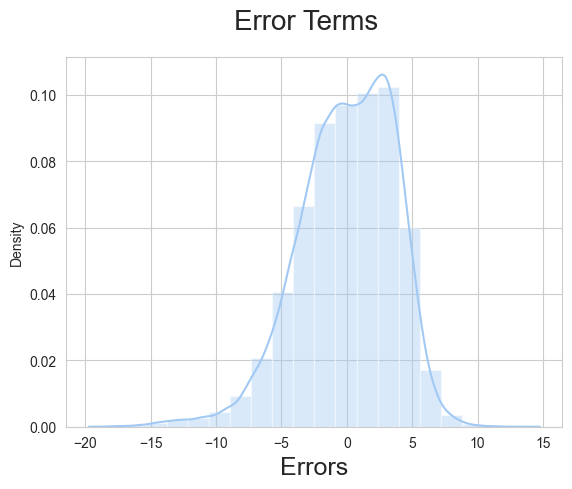

In [106]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_pred - y_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

Text(0, 0.5, 'y_test_pred')

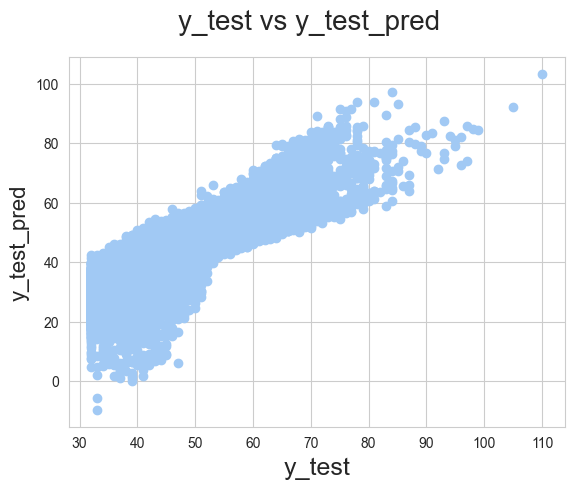

In [107]:
#Model Evaluation
#Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

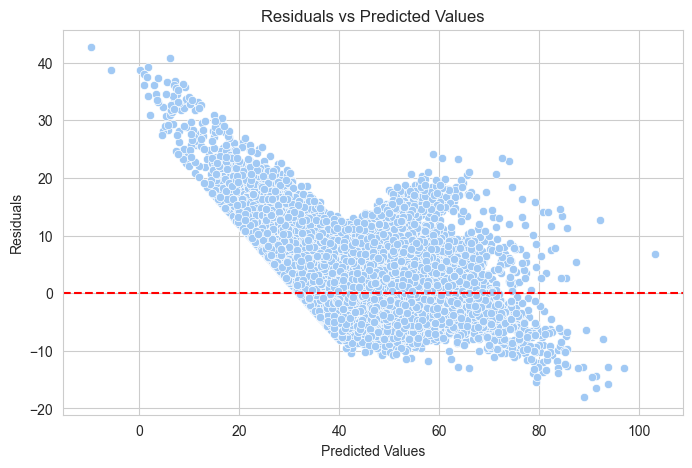

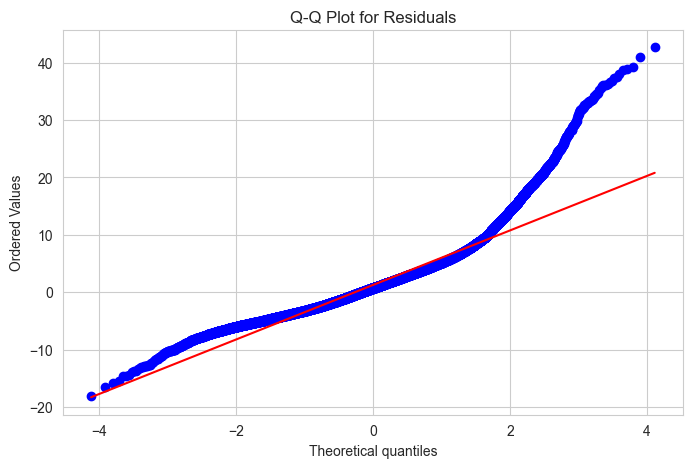

In [110]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats
residuals = y_test - y_test_pred

# Residuals vs Predicted Values Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [114]:
# Compare the scaled vs unscaled features used in the final model
# calculating scaled Features
# Extracting coefficients from the trained model
coefficients = model.coef_

coef_df = pd.DataFrame({'Feature': selected_features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Display the coefficients
print("Scaled Coefficients (Standardized Features):")
print(coef_df)


Scaled Coefficients (Standardized Features):
                    Feature  Coefficient
5  total_outstanding_orders     8.991483
6                  distance     4.438800
1                  subtotal     2.298502
2        num_distinct_items     0.934209
3            max_item_price     0.637852
0               total_items    -0.220859
4     total_onshift_dashers    -9.597121


In [115]:
#Calculating unscaled Features
original_std = X_train[selected_features].std()
unscaled_coefficients = coefficients * original_std  # Converting coefficients to unscaled values

unscaled_coef_df = pd.DataFrame({'Feature': selected_features, 'Unscaled Coefficient': unscaled_coefficients})
unscaled_coef_df = unscaled_coef_df.sort_values(by='Unscaled Coefficient', ascending=False)

# Display the unscaled coefficients
print("\nUnscaled Coefficients (Original Feature Scale):")
print(unscaled_coef_df)


Unscaled Coefficients (Original Feature Scale):
                                           Feature  Unscaled Coefficient
subtotal                                  subtotal           3272.330239
max_item_price                      max_item_price            323.179708
total_outstanding_orders  total_outstanding_orders            197.527503
distance                                  distance             38.771108
num_distinct_items              num_distinct_items              1.161829
total_items                            total_items             -0.330568
total_onshift_dashers        total_onshift_dashers           -148.932883


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [117]:
#Visulaizing feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=coef_df['Feature'], y=coef_df['Coefficient'])
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Scaled Coefficient Value")
plt.title("Feature Importance (Scaled Coefficients)")
plt.show()

In [118]:
# Analyze the effect of a unit change in a feature, say 'total_items'
feature_name = "total_items"

scaled_coefficient = coef_df[coef_df['Feature'] == feature_name]['Coefficient'].values[0]

original_std = X_train[feature_name].std()

# Convert to unscaled coefficient
unscaled_coefficient = scaled_coefficient * original_std

print(f"Effect of a unit change in '{feature_name}':")
print(f"Scaled Coefficient: {scaled_coefficient:.4f}")
print(f"Unscaled Coefficient: {unscaled_coefficient:.4f}")


Effect of a unit change in 'total_items':
Scaled Coefficient: -0.2209
Unscaled Coefficient: -0.3306


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes there are categorical Variables in the data.
> - **market_id** - This variable has a very weak relationship with delivery time.
> - **store_primary_category** - This is type of restaurant like fast food, dine-in etc. Restaurant type does not have any effect on delivery time.
> - **order_protocol** - If some protocols involve manual confirmation (e.g., phone orders), they may increase the order processing time and then delivery time too. Automated order placement methods (via an app) might be faster.
> - **isWeekend** - Orders placed on weekends might take longer time due to higher demand, traffic congestion, or restaurant workload.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> - In train-test splitting, the parameter `test_size=0.2` refers to the proportion of the dataset that will be allocated to the test set.
> - This means 20% of the total data will be used for testing purpose and 80% of the total data will be used to Train the model.
> - A proper splitting of data in train and test datasets ensure that the model is trained with one portion of the data and evaluated with another portion of unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Looking at the heatmap, variable `distance` has the highest (i.e. 0.46) positive correlation with target variable `delivery_time_minutes`. This means that with increase in distance the delivery time also increases.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
> My Approach to detect outliers:
> - **Boxplots (Visual Inspection)**
>      - I used box plots to visualise the outliers in the numerical features.
>      - Outliers appear as points outside the whiskers of the boxplot.
>      - **Inference**: Some features has extreme values which suggests extreme outliers.
> - **Z-Score Method (Statistical Approach)**
>      - A Z-Score method measures how many standard deviations a data point is from the mean.
>      - Generally a data point with |Z-Score| > 3 were considered as an Outliers.
>      - **Inference**: High absolute Z-scores indicate extreme outliers.
> - **IQR Method (Interquartile Range)**
>      - IQR = Q3 - Q1, where Q1 = 25th percentile, Q3 = 75th percentile
>      - Outlier Rule: Any value below (Q1 - 1.5IQR) or above (Q3 + 1.5IQR) is considered an outlier.
>
> My Approach to address outliers:
> - **Removal of Extreme Outliers**
>      - I have checked the percentage of data with outliers, it mostly less than 2-3 % hence I have dropped the rows with extreme outlier values.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on the final model, below top 3 features are significantly affecting the delivery time:
> - **Total Outstanding Orders (Coefficient: 8.99)**
>      - Total Outstanding orders has highest coefficient means, when total outstanding orders increases the delivery time also increase.
>      - Reason: More outstanding orders is a sign of a higher workload for delivery person, which will lead to longer wait times before an order is picked up.
> - **Distance (Coefficient: 4.43)**
>      - A positive coefficient indicates that an increase in delivery distance leads to a longer delivery time.
>      - Reason: Longer distances naturally result in longer travel times plus traffic for delivery partners.
> - **Total On-Shift Dashers (Coefficient: -9.59)**
>      - A negative coefficient means that as the number of available delivery partners increases, delivery time decreases.
>      - Reason: More available dashers ensure that orders are picked up and delivered faster, reducing wait times which lowers the delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear Regression is **supervised learning algorithm** used for predicting continuous dependent variable (target) based on one or many independent variables (features). With the use of this algorithm we can find best fit line which minimizes the error between the actual values and predicted values.
> There are 2 types of Linear Regressions:
> 1.  **Simple Linear Regression**:
>      - This involves **one dependent** variable and **one independent** variable to predict dependent variable.
>      - The relaionship between dependent and independent variable is modeled as:
>      - $ Y=mX+c $
> 2. **Multiple Linear Regression**:
>      - This involves **one depedent** variable and **multiple independent** variables to predict dependent variable.
>      - The relaionship between dependent and independent variables is modeled as:
>      - $ Y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n $
>
> Working of Linear Regression Algorithm:
> 1. **Step 1: Understanding the Relationship Between Variables**
>      - We assume that the dependent variable 𝑌 has a linear relationship with the independent variables X.
>      - We fit a straight line that best captures this relationship.
> 2. **Cost Function (Error Measurement)**
>      - The model calculates errors by comparing the predicted and actual values.
>      - The most common error metric used is Mean Squared Error (MSE).
> 3. **Optimization (Finding the Best Fit Line)**
>      - The goal is to minimize the MSE by finding the optimal coefficients.
>      - This is done using Gradient Descent or Ordinary Least Squares (OLS).
> 4. **Model Evaluation**
>      - The model's performance is measured using metrics like:
>      - **Mean Absolute Error (MAE)**: Measures average absolute differences.
>      - **Mean Squared Error (MSE)**: Penalizes larger errors.
>      - **Root Mean Squared Error (RMSE)**: More interpretable version of MSE.
>      - **R² Score**: Measures the proportion of variance explained by the model.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> The difference between Simple Linear Regression and Multiple Linear Regression:</span>

| Feature                              | Simple Linear Regression                             | Multiple Linear Regression                           |
|--------------------------------------|------------------------------------------------------|------------------------------------------------------|
| **Definition**                       | relationship between one independent variable and    | relationship between multiple independent variables  |
|                                      | one dependent variable.                              | and one dependent variable.                          |
| **Equation**                         | $Y=b_0 + b_1X_1$                                     | $Y=b_0+b_1X_1+b_2X_2+...+b_nX_n$                     |
| **Number of Independent Variables**  | Only one independent variable (predictor).           | Two or more independent variables (predictors).      |
| **Complexity**                       | Simple to understand and interpret.                  | More complex due to multiple predictors.             |
| **Visualization**                    | Can be represented on a 2D graph (straight line).    | Cannot be visualized easily beyond 3D (higher-       |
|                                      |                                                      | dimensional space).                                  |
| **Use Case**                         | Used when there is only one influencing factor.      | Used when multiple factors influence the dependent   |
|                                      |                                                      | variable.                                            |
| **Example**                          | Predicting sales based on marketing spend on TV.     | Predicting house price based on area, location and   |
|                                      |                                                      | number of rooms.                                     |



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> Role of Cost function in Linear Regression:
> - The cost function in linear regression measures how well the model’s predictions match the actual values. It quantifies the error between predicted values $\hat{Y}$ and actual values $Y$.
> - The most commonly used cost function in linear regression is Mean Squared Error (MSE).
> - $MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$
> - where $Y_i$ = Actual Values, $\hat{Y}_i$ = Predicted Values, $n$ = Number of Observations
> - Minimizing the cost function helps us find the best-fit line that reduces the prediction error and improves model’s accuracy.
> - There are many optimization techniques to minimize the cost function:
>      - 1. **Ordinary Least Squares (OLS)**: Finds the best-fit line by solving for coefficients analytically.
>             - $β=(X^TX)^{-1}X^TY$
>             - where $𝑋$ is the matrix of input features and $𝑌$ is the target variable.
>      - 2. **Gradient Descent (GD)**: Iterative approach to minimize the cost function.
>             - Updates coefficients using $b_j:=b_j - α \frac{∂J}{∂b_j}$
>             - where $𝛼$ = Learning rate (step size) and $\frac{∂J}{∂b_j}$ = Partial derivative of the cost function w.r.t. coefficient $b_j$.
> - The cost function evaluates model accuracy.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
> The difference between Overfitting and Underfitting:</span>

| Feature                              | Overfitting                                          | Underfitting                                         |
|--------------------------------------|------------------------------------------------------|------------------------------------------------------|
| **Definition**                       | The model learns the training data too well,         | The model is too simple and fails to capture the     |
|                                      | including noise, leading to poor generalization on   | patterns in the data.                                |
|                                      | new data.                                            |                                                      |
| **Performance on Training Data**     | High accuracy (low error).                           | Low accuracy (high error).                           |
| **Performance on Test Data**         | Poor generalization (high error).                    | Poor performance (high error).                       |
| **Bias-Variance Tradeoff**           | Low bias, high variance.                             | High bias, low variance.                             |
| **Cause**                            | Too many features or overly complex model.           | Too few features or overly simple model.             |
| **Visualization**                    | The model fits training data too closely and         | The model fails to capture important patterns in the |
|                                      | fails to generalize.                                 | data.                                                |



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> A residual plot helps assess the validity of a linear regression model by visualizing the residuals (errors) between predicted and actual values. It plots residuals on the Y-axis and predicted values on the X-axis.
> Through Residual Plot we check for 4 assumptions of Linear Regressions:
>    1. **Residuals should be randomly scattered around zero** - If there is any pattern or any curve in residual plot then the relationship may be non-linear, suggesting that linear regression is not the best fit.
>    2. **Detecting Heteroscedasticity** - Residuals should have constant spread across all values. If the spread increases or decreases systematically (e.g., forming a funnel shape), it indicates heteroscedasticity, violating the assumption of constant variance.
>    3. **Residuals should show no correlation** - If residuals display a pattern (e.g., cyclical behaviour), there might be autocorrelation between the variables.
>    4. **Detecting Outliers**: There should not be any extreme residuals. Large residuals suggest outliers which may mislead the model while doing predictions.